In [3]:
# load pandas (always do this first)
import pandas as pd
import numpy as np
import geopandas

%matplotlib inline
import matplotlib.pyplot as plt


Text(0.5, 0, 'Estimated Enrollment')

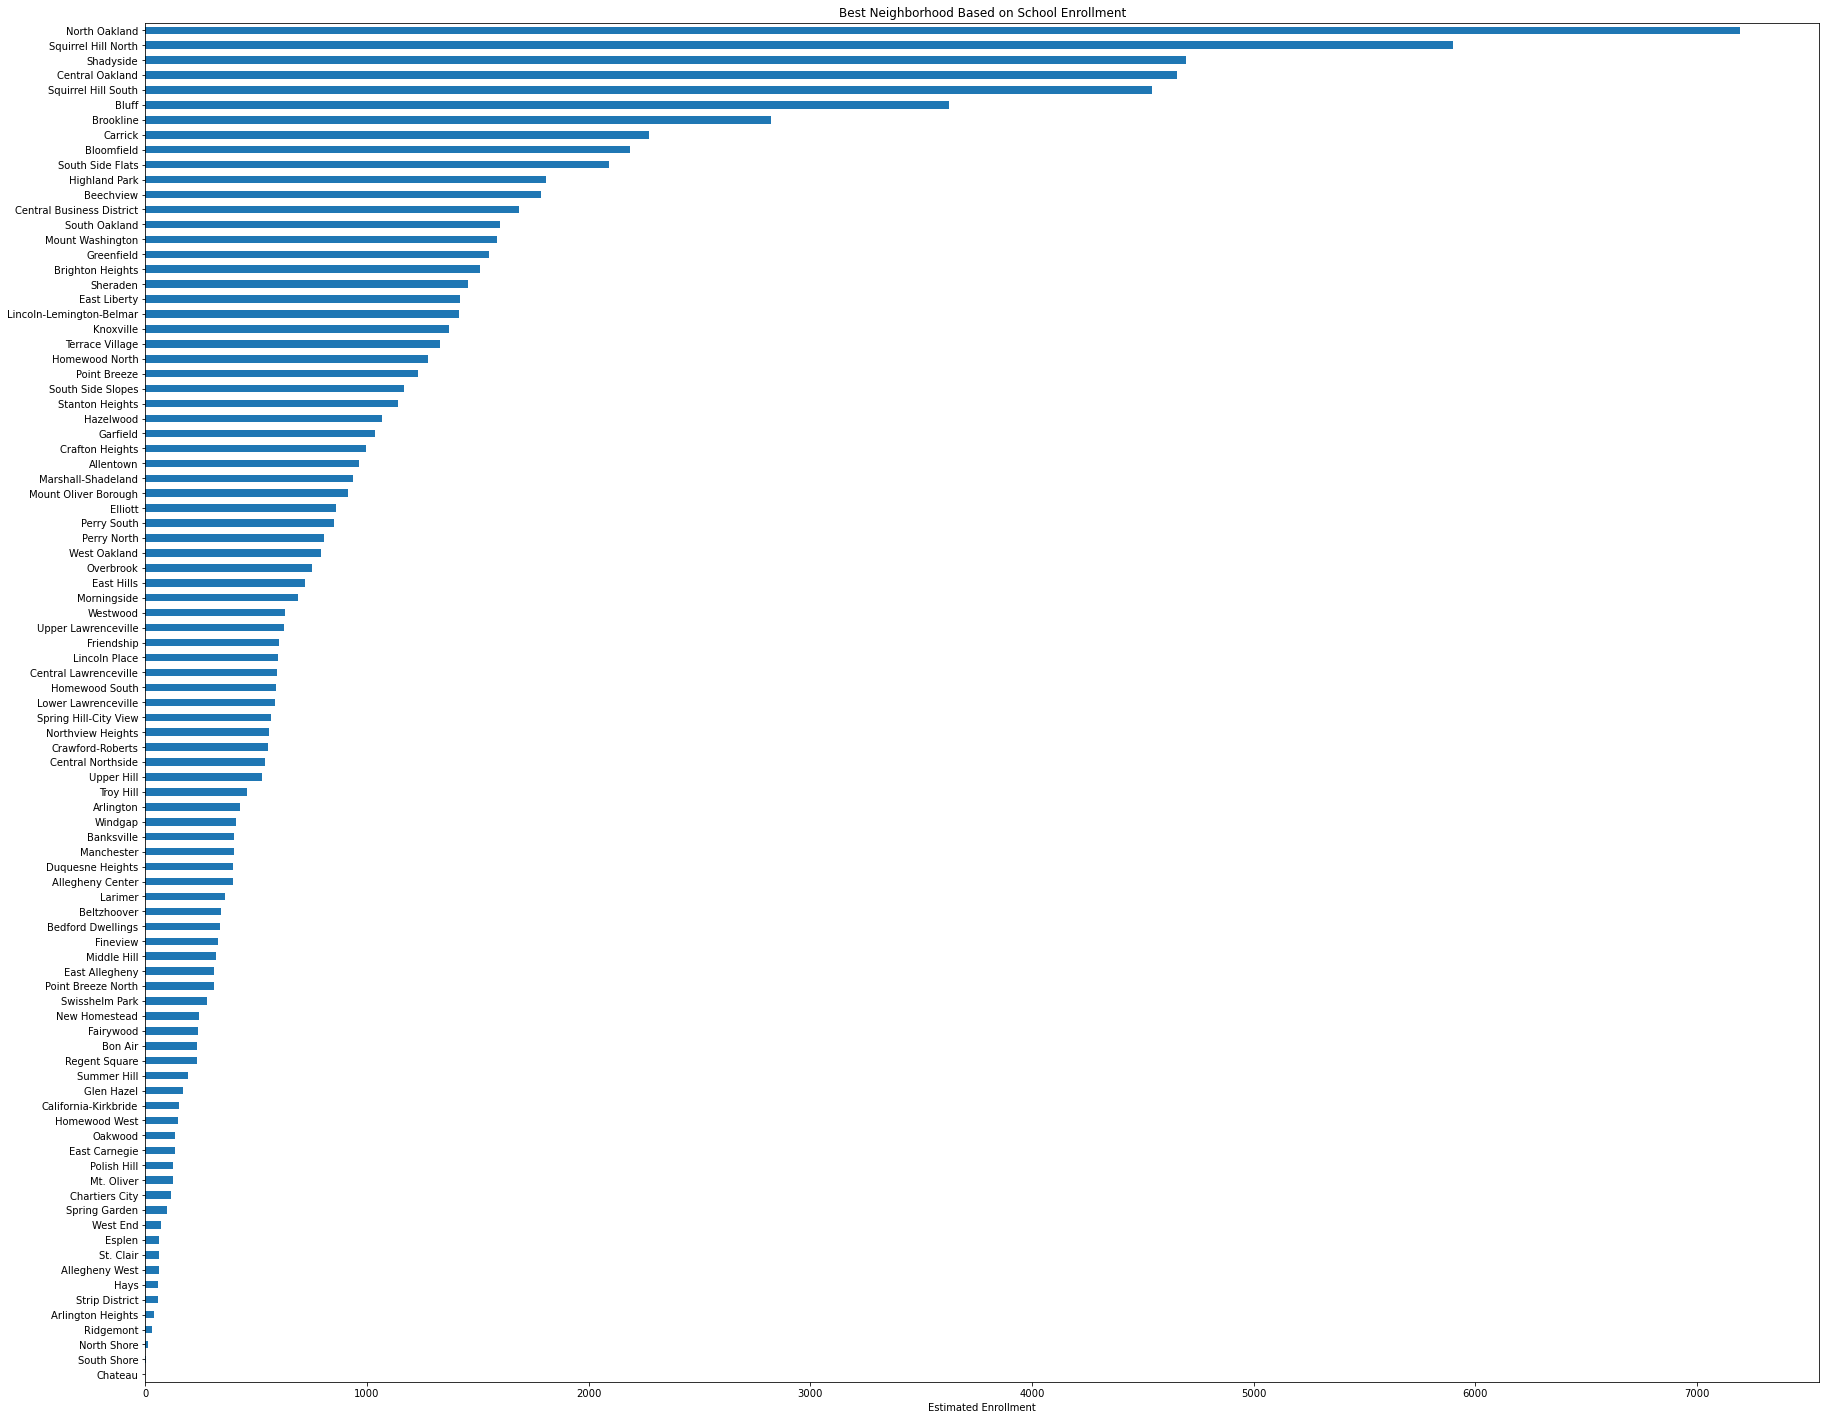

In [6]:
enroll = pd.read_csv("school-enrollment.csv")

sd = dict()
for index in enroll.index:
    sd.update({enroll.loc[index]['Neighborhood'] : enroll.loc[index]['Estimate; Enrolled in school:']})

data_graph = pd.Series(sd).sort_values(ascending=True)
data_graph.plot(kind='barh',
         figsize=(30,25))
plt.title("Best Neighborhood Based on School Enrollment")
plt.xlabel('Estimated Enrollment')

## TRYING MULTI BARS

In [3]:
test = pd.DataFrame(enroll.loc[:]['Neighborhood'], 
                    enroll.loc[:]['Estimate; Enrolled in school:'],
                    enroll.loc[:]['Estimate; Enrolled in school: - Enrolled in college, undergraduate years'])
test

"Estimate; Enrolled in school: - Enrolled in college, undergraduate years",150.0,2.0,125.0,142.0,12.0,23.0,24.0,559.0,140.0,693.0,...,40.0,58.0,1019.0,122.0,258.0,85.0,71.0,508.0,178.0,77.0
Estimate; Total:,,,,,,,,,,,,,,,,,,,,,
1389.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
343.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2520.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1823.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2662.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1681.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


6123.0

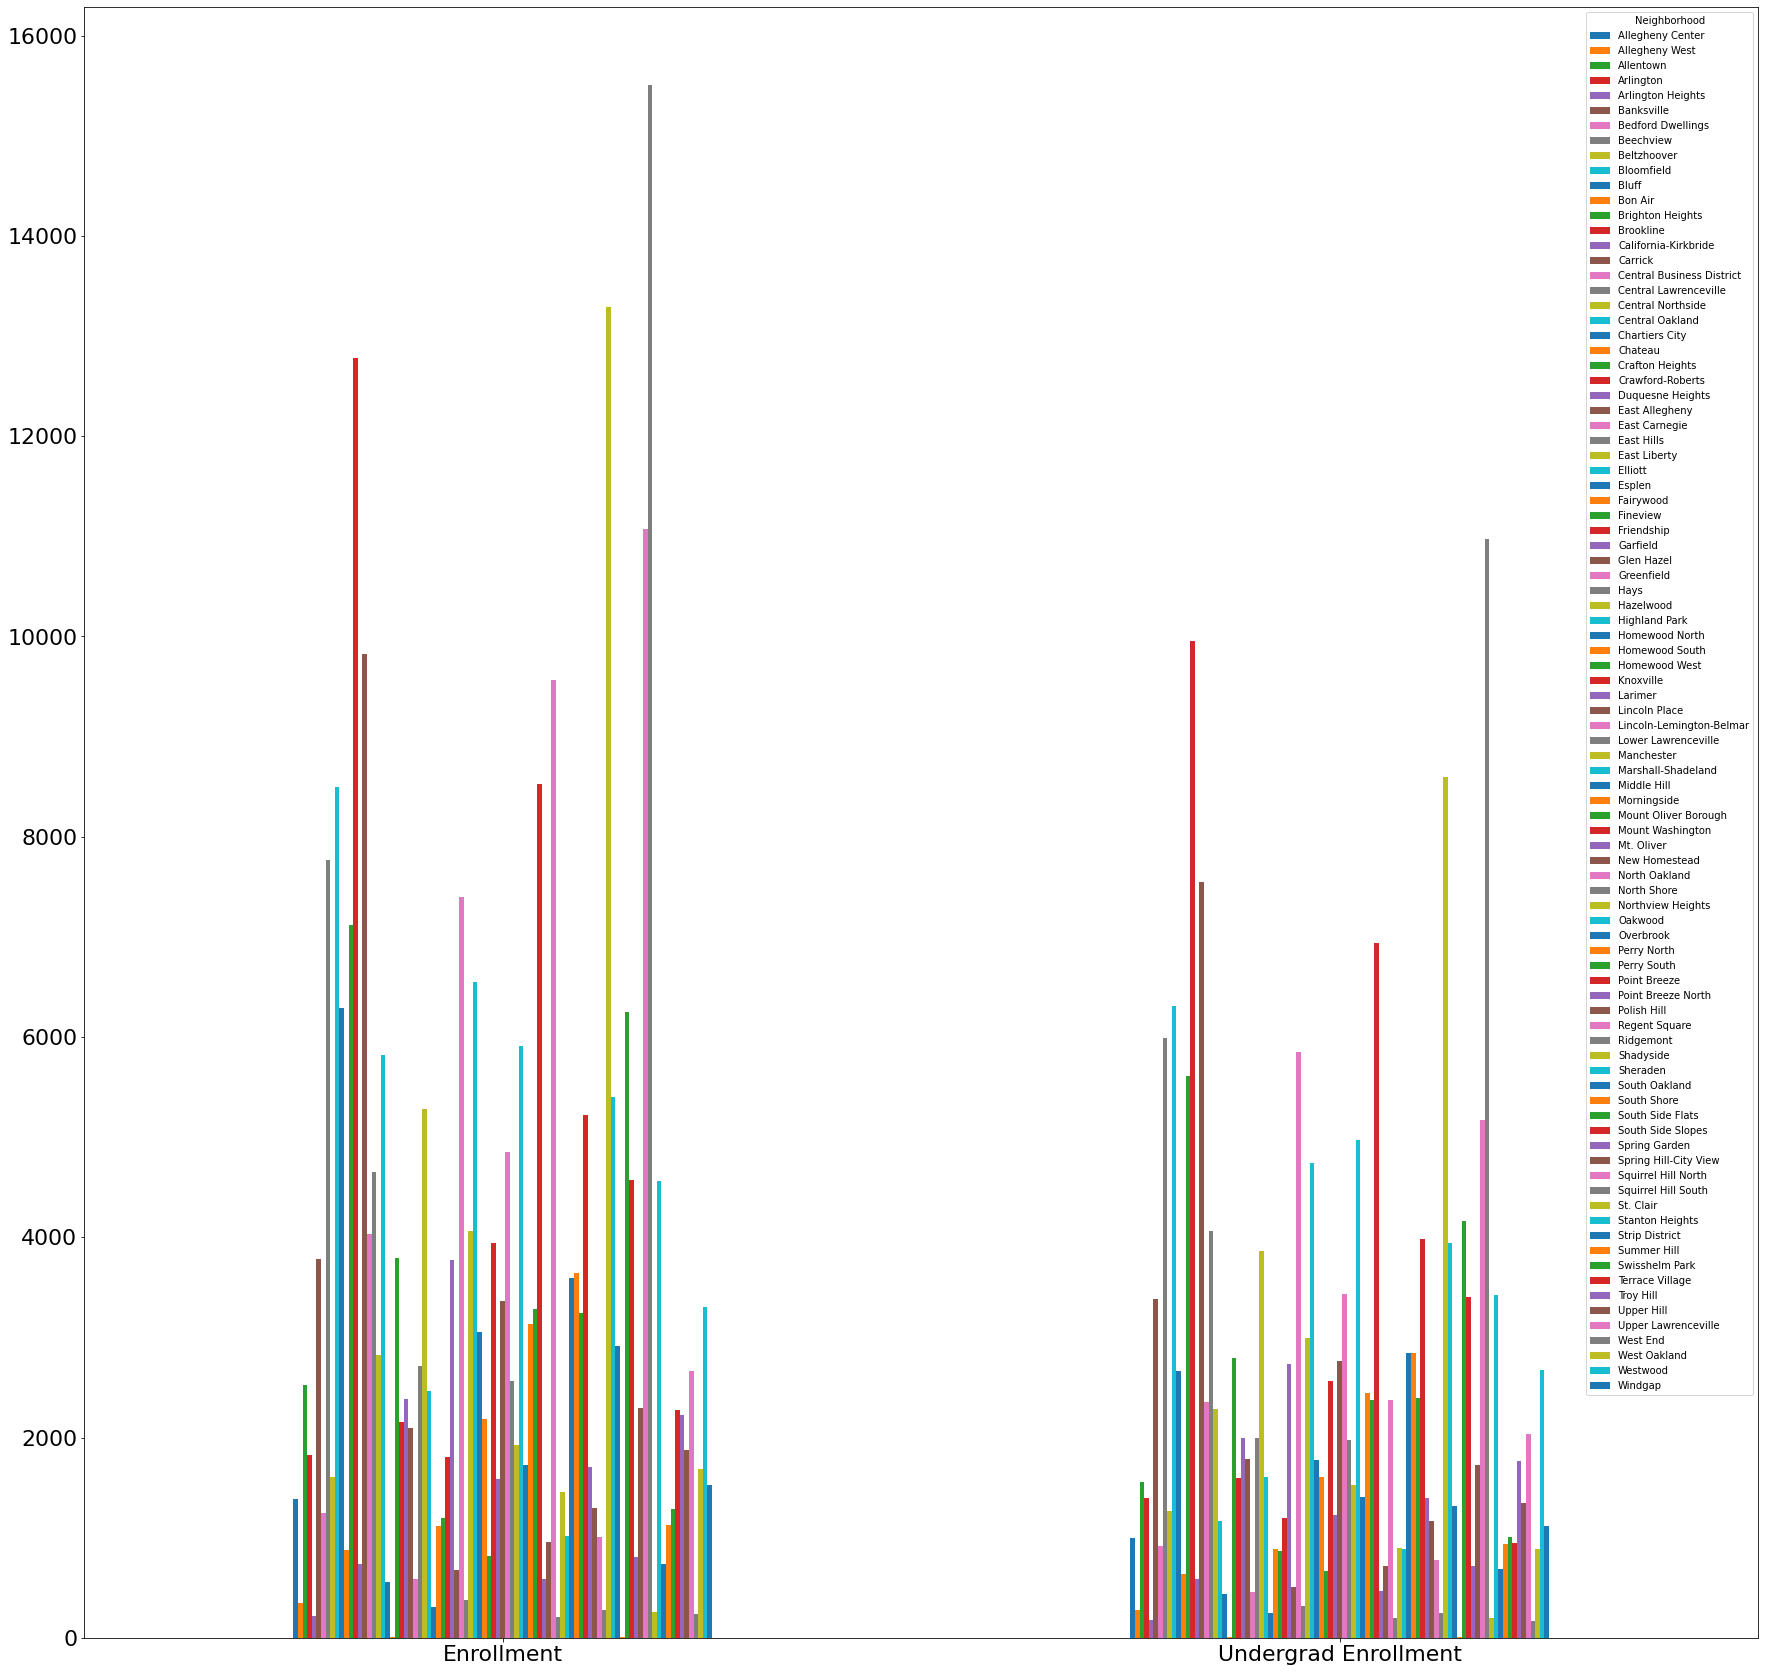

In [7]:
undergrad_enroll = pd.DataFrame(enroll,
                  columns=['Estimate; Total:',
                           'Estimate; Enrolled in school: - Enrolled in college, undergraduate years'])
undergrad_enroll

newdict = dict()

for index in enroll.index:
    newdict.update({enroll.loc[index]['Neighborhood'] :
                   [enroll.loc[index]['Estimate; Total:'], enroll.loc[index]['Estimate; Not enrolled in school']]})
newdata = pd.DataFrame(newdict, columns = enroll.loc[:]['Neighborhood'],
                      index = ["Enrollment","Undergrad Enrollment"])


newdata.plot(kind='bar',
             fontsize = 22,
             rot=0,
         figsize=(30,30))

newdata['North Oakland'] # undergrad 2nd to North Oakland

enroll['Estimate; Enrolled in school: - Enrolled in college, undergraduate years'].max()


<AxesSubplot:>

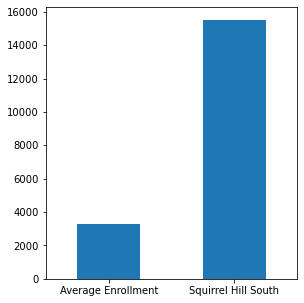

In [5]:
avg_dict = {"Average Enrollment" : data_graph.mean(),
           "North Oakland" : data_graph.max()}

avg_compare = pd.Series(avg_dict)
avg_compare.plot.bar(rot=0,
                    figsize=(4.5,5))

## Trying pie chart comparisons

<AxesSubplot:xlabel='Neighborhood', ylabel='North Oakland'>

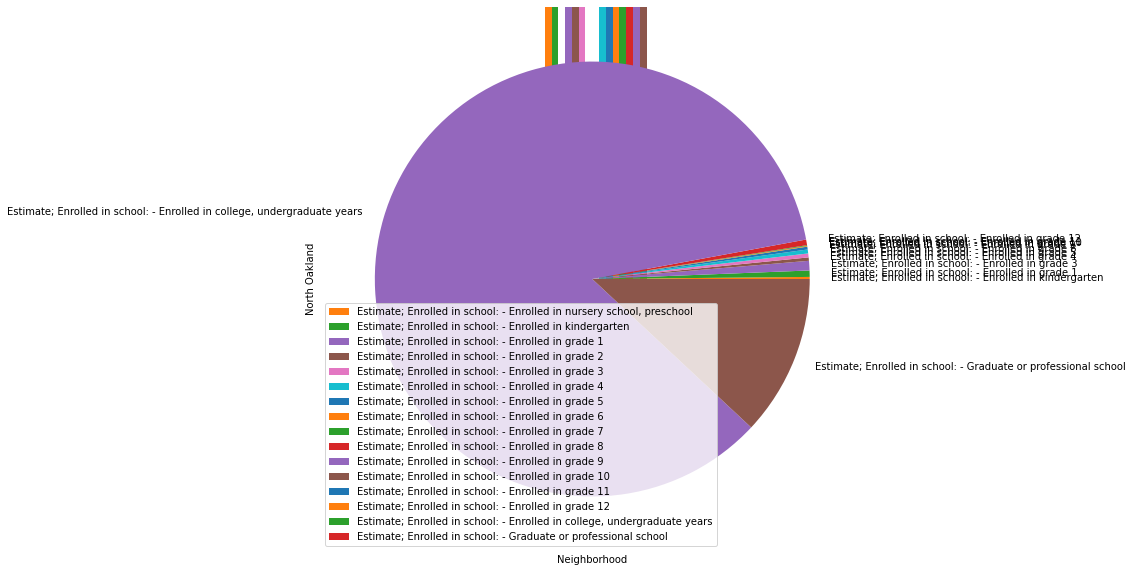

In [20]:
enroll = pd.read_csv("school-enrollment.csv",
                    index_col = 'Neighborhood')
del enroll['Id']
del enroll['Margin of Error; Total:']
del enroll["Margin of Error; Enrolled in school:"]
del enroll['Margin of Error; Enrolled in school: - Enrolled in nursery school, preschool']
del enroll['Margin of Error; Enrolled in school: - Enrolled in kindergarten']
del enroll['Margin of Error; Enrolled in school: - Enrolled in grade 1']
del enroll['Margin of Error; Enrolled in school: - Enrolled in grade 2']
del enroll['Margin of Error; Enrolled in school: - Enrolled in grade 3']
del enroll['Margin of Error; Enrolled in school: - Enrolled in grade 4']
del enroll['Margin of Error; Enrolled in school: - Enrolled in grade 5']
del enroll['Margin of Error; Enrolled in school: - Enrolled in grade 6']
del enroll['Margin of Error; Enrolled in school: - Enrolled in grade 7']
del enroll['Margin of Error; Enrolled in school: - Enrolled in grade 8']
del enroll['Margin of Error; Enrolled in school: - Enrolled in grade 9']
del enroll['Margin of Error; Enrolled in school: - Enrolled in grade 10']
del enroll['Margin of Error; Enrolled in school: - Enrolled in grade 11']
del enroll['Margin of Error; Enrolled in school: - Enrolled in grade 12']
del enroll['Margin of Error; Enrolled in school: - Enrolled in college, undergraduate years']
del enroll['Margin of Error; Enrolled in school: - Graduate or professional school']
del enroll['Margin of Error; Not enrolled in school']

del enroll['Estimate; Enrolled in school:']
del enroll['Estimate; Total:']
del enroll['Estimate; Not enrolled in school']

NorthOak = enroll['North Oakland': 'North Oakland'][:]
NorthOak.plot.bar(rot=0, 
                  figsize = (15,10))

no = NorthOak.squeeze()
no.plot.pie()


## GEO MAP


In [8]:
total_enro = enroll.groupby('Neighborhood').sum()['Estimate; Enrolled in school:']
total_enro.sort_values(ascending=False)

Neighborhood
North Oakland          7192.0
Squirrel Hill North    5901.0
Shadyside              4694.0
Central Oakland        4656.0
Squirrel Hill South    4541.0
                        ...  
Arlington Heights        40.0
Ridgemont                31.0
North Shore              12.0
South Shore               4.0
Chateau                   0.0
Name: Estimate; Enrolled in school:, Length: 91, dtype: float64

<AxesSubplot:>

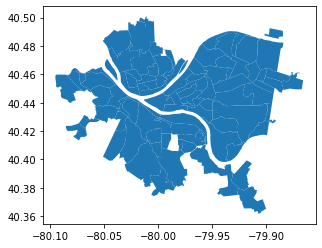

In [9]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe

In [10]:
neighborhoods[['hood','area','perimeter','geometry']]

,hood,area,perimeter,geometry
0,Central Oakland,7843108.0,11526.863,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,13904629.0,20941.387,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,5999801.5,18271.426,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,7202139.0,15696.759,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,16947852.0,23903.078,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."
...,...,...,...,...
85,Ridgemont,10278895.0,16268.131,"POLYGON ((-80.03431 40.43366, -80.03424 40.433..."
86,West End,5579501.0,18776.656,"POLYGON ((-80.02869 40.44454, -80.02845 40.444..."
87,California-Kirkbride,6050988.0,11711.301,"POLYGON ((-80.02039 40.46285, -80.02022 40.462..."
88,Glen Hazel,12713036.0,18931.703,"POLYGON ((-79.92030 40.41205, -79.92027 40.412..."


In [13]:
hood_map = neighborhoods.merge(total_enro, how='left', left_on='hood', right_on='Neighborhood')
# look at the head to confirm it merged correctly
hood_map[['hood','Estimate; Enrolled in school:','geometry']].head()

,hood,Estimate; Enrolled in school:,geometry
0,Central Oakland,4656.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,7192.0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,791.0,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,555.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,55.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


<AxesSubplot:>

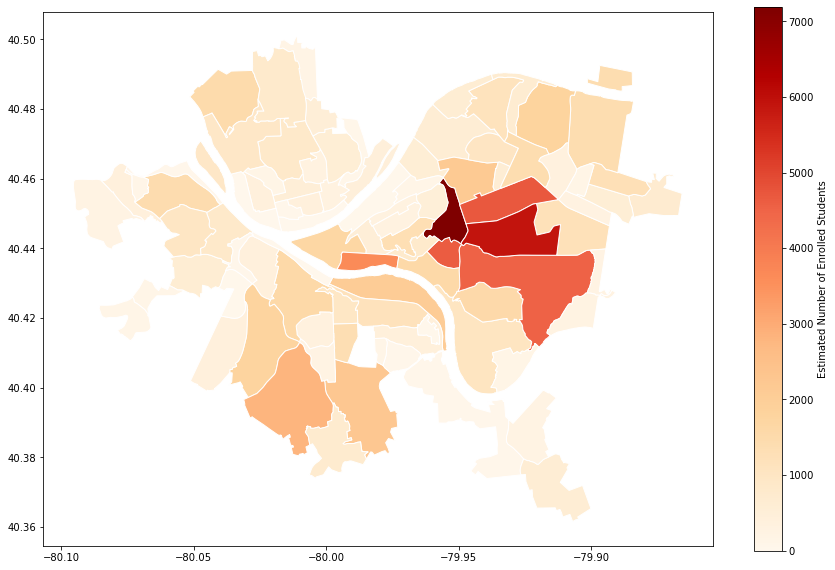

In [14]:
hood_map.plot(column='Estimate; Enrolled in school:', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Estimated Number of Enrolled Students"}, # label the legend
               figsize=(15, 10),         # set the size
               #doesnt work# missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )